# <b> <font color="blue" size="40"> Logistic Regression </font> </b>

## <font color=blue> Student admission decision making via logistic regression without regularisation </font>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('Material_By_DeepLearning')
from utils import *
import copy
import math

%matplotlib inline

### 2.1 Problem Statement

Suppose that you are the administrator of a university department and you want to determine each applicant’s chance of admission based on their results on two exams. 
* You have historical data from previous applicants that you can use as a training set for logistic regression. 
* For each training example, you have the applicant’s scores on two exams and the admissions decision. 
* Your task is to build a classification model that estimates an applicant’s probability of admission based on the scores from those two exams. 

### Loading data

In [2]:
data = np.loadtxt('data/ex2data1.txt',delimiter=",")
# print(data)
x_train = data[:,:2]
y_train = data[:,2]

# print(x_train)
# print(y_train)


### Let's plot the data

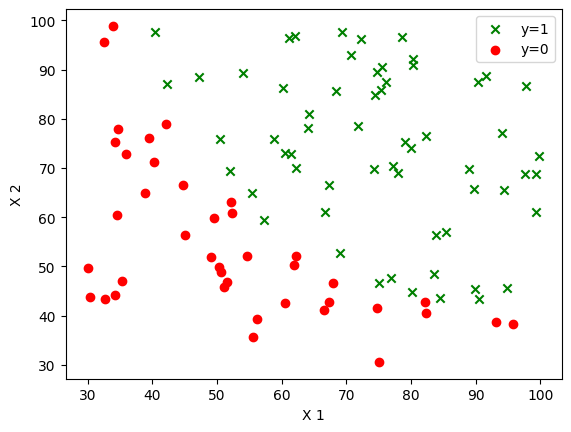

In [3]:
def plt_data(ax,x,y):
    pos = y==1
    neg = y==0
    
    ax.scatter(x[pos,0],x[pos,1],marker="x",c="green",label="y=1")
    ax.scatter(x[neg,0],x[neg,1],marker="o",c="red",label="y=0")
    ax.set_xlabel("X 1")
    ax.set_ylabel("X 2")
    ax.legend()

_,ax = plt.subplots(1,1)
plt_data(ax,x_train,y_train)
plt.show()

### Cost Calculation Function

In [4]:
def sigmoid(z):
    z = np.clip(z, -500, 500)
    return (1/(1+np.exp(-z)))

def Compute_Cost(x, y, w, b):
    """
    Computes the cost over all examples
    Args:
      X : (ndarray Shape (m,n)) data, m examples by n features
      y : (ndarray Shape (m,))  target value 
      w : (ndarray Shape (n,))  values of parameters of the model      
      b : (scalar)              value of bias parameter of the model
    Returns:
      total_cost : (scalar) cost 
    """
    total_cost = 0
    size_of_data = x.shape[0]
    
    for i in range(0,size_of_data):
        
        f_wb = sigmoid(np.dot(x[i],w)+b)
        total_cost += -(((y[i])*(np.log(f_wb))) + ((1-y[i])*(np.log(1-f_wb))))
        
    total_cost = total_cost/size_of_data
    return total_cost


### Let's test the cost function 

In [5]:
_,col = x_train.shape

w = np.zeros(col)
b = 0

print("Cost at test w and b (zeros)     = ", Compute_Cost(x_train,y_train,w,b) )

# Compute and display cost with non-zero w and b
test_w = np.array([0.2, 0.2])
test_b = -24.

print('Cost at test w and b (non-zeros) =  ',Compute_Cost(x_train, y_train, test_w, test_b))

# the ideal output must be
# Cost at test w and b (zeros)     =  0.6931471805599458
# Cost at test w and b (non-zeros) =   0.21833019382659777

Cost at test w and b (zeros)     =  0.6931471805599458
Cost at test w and b (non-zeros) =   0.21833019382659777


### Differentiation calculation function 

In [6]:
def Compute_Gradient(x, y, w, b):
    """
    Computes the gradient for logistic regression 
 ### Let's plot the data
    Args:
      X : (ndarray Shape (m,n)) data, m examples by n features
      y : (ndarray Shape (m,))  target value 
      w : (ndarray Shape (n,))  values of parameters of the model      
      b : (scalar)              value of bias parameter of the model
      *argv : unused, for compatibility with regularized version below
    Returns
      dj_dw : (ndarray Shape (n,)) The gradient of the cost w.r.t. the parameters w. 
      dj_db : (scalar)             The gradient of the cost w.r.t. the parameter b. 
    """
    
    row, col = x.shape
    dj_dw = np.zeros(col)
    dj_db = 0
    
    for i in range(0,row):
        
        f_wb = sigmoid(np.dot(w,x[i])+b)
        error = f_wb - y[i]
        
        for j in range(col):
            dj_dw[j] += error*x[i,j]
        
        dj_db += error
    dj_dw = dj_dw/row
    dj_db = dj_db/row
    
    return dj_dw,dj_db

### Let's test Compute_Gradient

In [7]:
w = np.array([0.2,-0.5])
b=-24

w,b = Compute_Gradient(x_train,y_train,w,b)

print('dj_db at test b = :', b)
print('dj_db at test w = :', w.tolist())

# ideal value must be 
# dj_db at test b = : -0.5999999999991071
# dj_db at test w = : [-44.831353617873795, -44.37384124953978]

dj_db at test b = : -0.5999999999991071
dj_db at test w = : [-44.831353617873795, -44.37384124953978]


### Gradient Descent Algorithm for choosing optimal w and b

In [22]:
def compute_Gradient_Descent(x, y, w, b, alpha, iteration):
    
    row,col = x.shape
    j_history = []

    for i in range(0,iteration):
        
        dj_dw,dj_db = Compute_Gradient(x,y,w,b)
        
        for j in range(col):
            w[j] -= alpha*dj_dw[j]
            
        b -= alpha * dj_db
        
        if(i<10000):
            j_history.append(Compute_Cost(x,y,w,b))
            
        if(i%1000 == 0):
            print(f"iteration: {i} , and cost: {j_history[-1]}")
            
    return w ,b ,j_history

### Running algorithm to get w and b 

In [9]:
np.random.seed(1)
### Let's plot the data
initial_w = 0.01 * (np.random.rand(2) - 0.5)
initial_b = -8

# Some gradient descent settings
iterations = 10000
alpha = 0.001

w,b, J_history = compute_Gradient_Descent(x_train,y_train,initial_w,initial_b,alpha,iterations)

print('the final w is : ',w)
print('the final b is : ',b)

iteration: 0 , and cost: 0.963790183213751
iteration: 1000 , and cost: 0.30509032658691543
iteration: 2000 , and cost: 0.30472280911605265
iteration: 3000 , and cost: 0.3043577091139877
iteration: 4000 , and cost: 0.30399500255077394
iteration: 5000 , and cost: 0.3036346657142008
iteration: 6000 , and cost: 0.3032766752046074
iteration: 7000 , and cost: 0.30292100792979143
iteration: 8000 , and cost: 0.30256764110002177
iteration: 9000 , and cost: 0.3022165522231424
the final w is :  [0.07125355 0.06482888]
the final b is :  -8.188622906639248


### Ploting decision boundary 

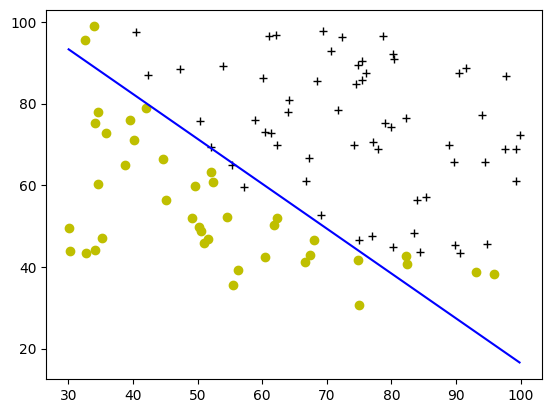

In [10]:
### Let's plot the data
plot_decision_boundary(w,b,x_train,y_train)

### Making prediction function to make predictions on new data 

In [11]:
def pridect(x,w,b):
    """
    Predict whether the label is 0 or 1 using learned logistic
    regression parameters w
    
    Args:
      X : (ndarray Shape (m,n)) data, m examples by n features
      w : (ndarray Shape (n,))  values of parameters of the model      
      b : (scalar)              value of bias parameter of the model

    Returns:
      p : (ndarray (m,)) The predictions for X using a threshold at 0.5
    """
    Size_of_data = x.shape[0]
    p = np.zeros(Size_of_data)
    
    for i in range(0,Size_of_data):
        z = np.dot(x[i],w)+b
        f_wb = sigmoid(z)
        if(f_wb >= 0.5):
            p[i]=(1)
        else:
            p[i]=(0)
            
    return p 

### Testing predict Function 

In [12]:
np.random.seed(1)
tmp_w = np.random.randn(2)
tmp_b = 0.3    
tmp_X = np.random.randn(4, 2) - 0.5

tmp_p = pridect(tmp_X, tmp_w, tmp_b)
print(f'Output of predict: shape {tmp_p.shape}, value {tmp_p}')


Output of predict: shape (4,), value [0. 1. 1. 1.]


### Now let's use this to compute the accuracy on the training set

In [21]:
p = pridect(x_train,w,b)
# print("y_train = \n",y_train)
# print("p = \n",p)
efficency = np.sum(p == y_train)/len(y_train) #np.sum will count only those element who is true
print(efficency * 100," %")

92.0  %
